In [2]:
import pandas as pd
import csv
import os

In [3]:
import re

def split_number(s):
    return list(filter(None, re.split(r'(\d+)', s)))

In [4]:
basic_stats = [
    'up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var', 'up_bytes_skew', 'up_bytes_kurt',
    'up_bytes_perc25', 'up_bytes_perc50', 'up_bytes_perc75', 'up_bytes_perc90',
    'up_packet_mean', 'up_packet_median', 'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
    'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75', 'up_packet_perc90',
    'down_bytes_mean', 'down_bytes_median', 'down_bytes_std', 'down_bytes_var', 'down_bytes_skew', 'down_bytes_kurt',
    'down_bytes_perc25', 'down_bytes_perc50', 'down_bytes_perc75', 'down_bytes_perc90',
    'down_packet_mean', 'down_packet_median', 'down_packet_std', 'down_packet_var', 'down_packet_skew', 'down_packet_kurt',
    'down_packet_perc25', 'down_packet_perc50', 'down_packet_perc75', 'down_packet_perc90']

silences = ['down_bytes_silences', 'down_bytes_silence_mean', 'down_bytes_longest_silence', 'down_bytes_shortest_silence',
           'up_bytes_silences', 'up_bytes_silence_mean', 'up_bytes_longest_silence', 'up_bytes_shortest_silence']

scalogram = ['up_bytes_1max_y', 'up_bytes_2max_y', 'up_bytes_3max_y', 'up_bytes_4max_y', 'up_bytes_5max_y',
    'up_bytes_1max_x', 'up_bytes_2max_x', 'up_bytes_3max_x', 'up_bytes_4max_x', 'up_bytes_5max_x',
    'up_bytes_1min_y', 'up_bytes_2min_y', 'up_bytes_3min_y', 'up_bytes_4min_y', 'up_bytes_5min_y',
    'up_bytes_1min_x', 'up_bytes_2min_x', 'up_bytes_3min_x', 'up_bytes_4min_x', 'up_bytes_5min_x',
    'up_packet_1max_y', 'up_packet_2max_y', 'up_packet_3max_y', 'up_packet_4max_y', 'up_packet_5max_y',
    'up_packet_1max_x', 'up_packet_2max_x', 'up_packet_3max_x', 'up_packet_4max_x', 'up_packet_5max_x',
    'up_packet_1min_y', 'up_packet_2min_y', 'up_packet_2min_y', 'up_packet_4min_y', 'up_packet_5min_y',
    'up_packet_1min_x', 'up_packet_2min_x', 'up_packet_3min_x', 'up_packet_4min_x', 'up_packet_5min_x',
    'down_bytes_1max_y', 'down_bytes_2max_y', 'down_bytes_3max_y', 'down_bytes_4max_y', 'down_bytes_5max_y',
    'down_bytes_1max_x', 'down_bytes_2max_x', 'down_bytes_3max_x', 'down_bytes_4max_x', 'down_bytes_5max_x',
    'down_bytes_1min_y', 'down_bytes_2min_y', 'down_bytes_3min_y', 'down_bytes_4min_y', 'down_bytes_5min_y',
    'down_bytes_1min_x', 'down_bytes_2min_x', 'down_bytes_3min_x', 'down_bytes_4min_x', 'down_bytes_5min_x',
    'down_packet_1max_y', 'down_packet_2max_y', 'down_packet_3max_y', 'down_packet_4max_y', 'down_packet_5max_y',
    'down_packet_1max_x', 'down_packet_2max_x', 'down_packet_3max_x', 'down_packet_4max_x', 'down_packet_5max_x',
    'down_packet_1min_y', 'down_packet_2min_y', 'down_packet_2min_y', 'down_packet_4min_y', 'down_packet_5min_y',
    'down_packet_1min_x', 'down_packet_2min_x', 'down_packet_3min_x', 'down_packet_4min_x', 'down_packet_5min_x']

In [6]:

base_folder = "csv/"
file_name = 'all_30s_01s_128.csv'

dataset = pd.read_csv(os.path.join(str(base_folder), str(file_name)))

dataset = dataset.drop(columns=['Unnamed: 0']).reset_index()
dataset.drop(columns=['index', 'up_packet_silence_mean', 'down_packet_silence_mean',
                      'down_packet_longest_silence', 'down_packet_shortest_silence'], inplace=True)
features = dataset.columns
print(features)
print(len(features))

FileNotFoundError: File b'csv/all_30s_01s_128.csv' does not exist

In [58]:
dataset.loc[dataset['label'] == 'netflix-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-ssh', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'acestream-openvpn', 'label'] = 'acestream'
dataset.loc[dataset['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'reddit', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'facebook', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'netflix', 'label'] = 'video'
dataset.loc[dataset['label'] == 'youtube', 'label'] = 'video'
dataset.loc[dataset['label'] == 'twitch', 'label'] = 'video'


dataset['label'].value_counts()

video        6969
browsing     1774
acestream    1258
Name: label, dtype: int64

In [59]:
dataset = dataset[dataset.label != 'acestream']
dataset['label'].value_counts()

video       6969
browsing    1774
Name: label, dtype: int64

In [60]:
#Test some stuff
#dataset.drop(columns=silences, inplace=True)
dataset.columns
features = dataset.columns[:-1]
features

Index(['up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var',
       'up_bytes_skew', 'up_bytes_kurt', 'up_bytes_perc25', 'up_bytes_perc50',
       'up_bytes_perc75', 'up_bytes_perc90',
       ...
       'down_packet_1min_y', 'down_packet_2min_y', 'down_packet_3min_y',
       'down_packet_4min_y', 'down_packet_5min_y', 'down_packet_1min_x',
       'down_packet_2min_x', 'down_packet_3min_x', 'down_packet_4min_x',
       'down_packet_5min_x'],
      dtype='object', length=132)

In [61]:
prevlabel = dataset['label']
dataset['label'] = pd.factorize(dataset['label'])[0]
labels = dataset['label']
labels

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
9971     0
9972     0
9973     0
9974     0
9975     0
9976     0
9977     0
9978     0
9979     0
9980     0
9981     0
9982     0
9983     0
9984     0
9985     0
9986     0
9987     0
9988     0
9989     0
9990     0
9991     0
9992     0
9993     0
9994     0
9995     0
9996     0
9997     0
9998     0
9999     0
10000    0
Name: label, Length: 8743, dtype: int64

In [62]:
dataset.corr()['label'].sort_values(ascending=False)

label                          1.000000
down_packet_4min_y             0.165449
down_packet_4max_y             0.160212
down_packet_5min_y             0.150855
down_packet_5max_y             0.150648
up_packet_4min_y               0.148293
up_packet_4max_y               0.144364
up_packet_5min_y               0.143634
up_packet_5max_y               0.143189
down_bytes_4min_y              0.140899
down_bytes_4max_y              0.135313
up_bytes_4min_y                0.113051
down_bytes_5max_y              0.112165
down_bytes_5min_y              0.110683
down_packet_5min_x             0.110231
up_bytes_5min_y                0.110131
up_bytes_5max_y                0.108363
up_packet_5min_x               0.106762
up_bytes_4max_y                0.104665
down_packet_5max_x             0.099368
up_packet_5max_x               0.096579
down_packet_4min_x             0.094900
up_bytes_5min_x                0.091211
down_bytes_skew                0.089639
up_bytes_5max_x                0.081405


In [63]:
# Imputer for NaN
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(dataset)
dataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)

In [64]:
'''
from sklearn.preprocessing import normalize
# Normalize data
dataset_no_label = dataset.loc[:, dataset.columns != 'label']

#dataset = (dataset_no_label - dataset_no_label.mean()) / (dataset_no_label.max() - dataset_no_label.min())
dataset_normalized = normalize(dataset_no_label)
dataset = pd.DataFrame(dataset_normalized, columns=features)
'''

"\nfrom sklearn.preprocessing import normalize\n# Normalize data\ndataset_no_label = dataset.loc[:, dataset.columns != 'label']\n\n#dataset = (dataset_no_label - dataset_no_label.mean()) / (dataset_no_label.max() - dataset_no_label.min())\ndataset_normalized = normalize(dataset_no_label)\ndataset = pd.DataFrame(dataset_normalized, columns=features)\n"

In [65]:
#PCA
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
main_components = pca.fit_transform(dataset)
dataset = pd.DataFrame(data = main_components)
dataset['label'] = labels
'''

"\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=20)\nmain_components = pca.fit_transform(dataset)\ndataset = pd.DataFrame(data = main_components)\ndataset['label'] = labels\n"

In [66]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

y_train = train['label']
x_train = train.drop(columns=['label'])

y_test = test['label']
x_test = test.drop(columns=['label'])


In [67]:
y_train_youtube = (y_train == 0)
y_train_netflix = (y_train == 1)
y_train_twitch = (y_train == 2)


In [68]:
x_train

,up_bytes_mean,up_bytes_median,up_bytes_std,up_bytes_var,up_bytes_skew,up_bytes_kurt,up_bytes_perc25,up_bytes_perc50,up_bytes_perc75,up_bytes_perc90,...,down_packet_1min_y,down_packet_2min_y,down_packet_3min_y,down_packet_4min_y,down_packet_5min_y,down_packet_1min_x,down_packet_2min_x,down_packet_3min_x,down_packet_4min_x,down_packet_5min_x
2002,-0.095683,-0.098760,0.016585,2.750500e-04,5.210940,25.196312,-0.09876,-0.098760,-0.098760,-0.098760,...,0.002965,0.004055,0.004195,-1.000000,-1.000000,24.809358,17.166958,14.993341,-1.000000,-1.000000
6972,-0.098676,-0.098760,0.000649,4.205620e-07,7.550957,55.016949,-0.09876,-0.098760,-0.098760,-0.098760,...,0.002176,0.003042,0.003324,0.003368,0.003374,24.944070,17.166958,9.411176,6.654706,5.048789
1916,-0.096516,-0.098760,0.016245,2.638908e-04,7.507542,54.569792,-0.09876,-0.098760,-0.098760,-0.098760,...,0.002341,0.003236,0.003478,-1.000000,-1.000000,24.809358,17.353894,9.827844,-1.000000,-1.000000
1550,-0.098061,-0.098760,0.004696,2.204939e-05,7.440762,53.873398,-0.09876,-0.098760,-0.098760,-0.098760,...,0.000928,0.005393,0.001574,0.002838,0.002571,27.054797,16.982036,11.943262,7.063154,3.589418
2358,-0.098136,-0.098760,0.004739,2.245781e-05,7.550226,55.009690,-0.09876,-0.098760,-0.098760,-0.098760,...,0.002255,0.003140,0.003704,0.003421,-1.000000,24.542112,17.927004,14.514017,8.175177,-1.000000
6726,-0.097817,-0.098760,0.005061,2.561027e-05,7.008363,49.165454,-0.09876,-0.098760,-0.098760,-0.098243,...,0.000267,0.005086,0.001918,0.003033,0.003236,28.252615,17.638121,11.943262,7.140066,4.913922
3884,-0.098441,-0.098760,0.001115,1.243981e-06,3.400699,9.860083,-0.09876,-0.098760,-0.098760,-0.098747,...,0.004488,0.005749,0.000093,-1.000000,-1.000000,24.675373,17.353894,3.169077,-1.000000,-1.000000
7947,-0.098703,-0.098760,0.000439,1.928032e-07,7.550957,55.016949,-0.09876,-0.098760,-0.098760,-0.098760,...,0.002196,0.003044,0.003364,0.003310,0.003365,24.675373,17.733895,14.435633,10.431050,7.537377
1739,-0.098430,-0.098760,0.001203,1.447403e-06,4.159958,18.458041,-0.09876,-0.098760,-0.098760,-0.098760,...,0.002696,0.002079,0.003317,0.003492,-1.000000,25.628684,15.321652,9.259521,6.338153,-1.000000
4071,-0.098261,-0.098760,0.001234,1.522747e-06,3.379797,12.314956,-0.09876,-0.098760,-0.098694,-0.097296,...,0.004778,0.000310,0.000779,-1.000000,-1.000000,22.383675,14.203012,3.789152,-1.000000,-1.000000


In [69]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
import matplotlib.pyplot as plt

random_forest = RandomForestClassifier(random_state=42)
y_probas_forest_y = cross_val_predict(random_forest, x_train, y_train_youtube, cv=10, method="predict_proba")
y_probas_forest_n = cross_val_predict(random_forest, x_train, y_train_netflix, cv=10, method="predict_proba")
y_probas_forest_t = cross_val_predict(random_forest, x_train, y_train_twitch, cv=10, method="predict_proba")
y_probas_forest = cross_val_predict(random_forest, x_train, y_train, cv=10, method="predict_proba")
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import cross_val_predict, cross_val_score\nimport matplotlib.pyplot as plt\n\nrandom_forest = RandomForestClassifier(random_state=42)\ny_probas_forest_y = cross_val_predict(random_forest, x_train, y_train_youtube, cv=10, method="predict_proba")\ny_probas_forest_n = cross_val_predict(random_forest, x_train, y_train_netflix, cv=10, method="predict_proba")\ny_probas_forest_t = cross_val_predict(random_forest, x_train, y_train_twitch, cv=10, method="predict_proba")\ny_probas_forest = cross_val_predict(random_forest, x_train, y_train, cv=10, method="predict_proba")\n'

In [70]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [71]:
'''
y_scores_forest_y = y_probas_forest_y[:, 1]
y_scores_forest_n = y_probas_forest_n[:, 1]
y_scores_forest_t = y_probas_forest_t[:, 1]

fpr_forest_y, tpr_forest_y, thresholds_forest_y = roc_curve(y_train_youtube, y_scores_forest_y)
fpr_forest_n, tpr_forest_n, thresholds_forest_n = roc_curve(y_train_netflix, y_scores_forest_n)
fpr_forest_t, tpr_forest_t, thresholds_forest_t = roc_curve(y_train_twitch, y_scores_forest_t)
#fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_probas_forest)


plot_roc_curve(fpr_forest_y, tpr_forest_y, "YouTube")
plot_roc_curve(fpr_forest_n, tpr_forest_n, "Netflix")
plot_roc_curve(fpr_forest_t, tpr_forest_t, "Twitch")
#plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

plt.legend(loc="lower right")
plt.show()
#cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
#accuracy = sum(cvs)/len(cvs)
#print("Accuracy: " + str(accuracy))
'''

'\ny_scores_forest_y = y_probas_forest_y[:, 1]\ny_scores_forest_n = y_probas_forest_n[:, 1]\ny_scores_forest_t = y_probas_forest_t[:, 1]\n\nfpr_forest_y, tpr_forest_y, thresholds_forest_y = roc_curve(y_train_youtube, y_scores_forest_y)\nfpr_forest_n, tpr_forest_n, thresholds_forest_n = roc_curve(y_train_netflix, y_scores_forest_n)\nfpr_forest_t, tpr_forest_t, thresholds_forest_t = roc_curve(y_train_twitch, y_scores_forest_t)\n#fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_probas_forest)\n\n\nplot_roc_curve(fpr_forest_y, tpr_forest_y, "YouTube")\nplot_roc_curve(fpr_forest_n, tpr_forest_n, "Netflix")\nplot_roc_curve(fpr_forest_t, tpr_forest_t, "Twitch")\n#plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")\n\nplt.legend(loc="lower right")\nplt.show()\n#cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring=\'accuracy\')\n#accuracy = sum(cvs)/len(cvs)\n#print("Accuracy: " + str(accuracy))\n'

In [72]:
'''
random_forest.fit(x_train, y_train)
predictions = random_forest.predict(x_test)
conf_mx = confusion_matrix(y_test, predictions)
plt.matshow(conf_mx, cmap=plt.cm.gray)
conf_mx
'''

'\nrandom_forest.fit(x_train, y_train)\npredictions = random_forest.predict(x_test)\nconf_mx = confusion_matrix(y_test, predictions)\nplt.matshow(conf_mx, cmap=plt.cm.gray)\nconf_mx\n'

In [73]:
#grid_search_acc = GridSearchCV(random_forest, params, cv=10, scoring='accuracy')
#grid_search_acc.fit(x_train, y_train)

In [74]:
#best = grid_search.best_estimator_

In [75]:
#best2 = grid_search_acc.best_estimator_

In [76]:
#sorted(zip(grid_search.best_estimator_.feature_importances_, basic_stats), reverse=True)

In [77]:
'''
# Final evaluation
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False, random_state=42, verbose=0, warm_start=False)
rf.fit(x_train, y_train)
print("Accuracy train set: " + str(sum(rf.predict(x_train) == y_train)/float(len(y_train))))
print("Accuracy test set: " + str(sum(rf.predict(x_test) == y_test)/float(len(y_test))))
'''

'\n# Final evaluation\nrf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion=\'entropy\', max_depth=9, max_features=\'log2\', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False, random_state=42, verbose=0, warm_start=False)\nrf.fit(x_train, y_train)\nprint("Accuracy train set: " + str(sum(rf.predict(x_train) == y_train)/float(len(y_train))))\nprint("Accuracy test set: " + str(sum(rf.predict(x_test) == y_test)/float(len(y_test))))\n'

In [78]:
'''
crossval = cross_val_predict(rf, x_train, y_train, cv=10, method="predict_proba")
crossvalscore = cross_val_score(rf, x_train, y_train, cv=10, scoring="accuracy")
print("\tCrossValScore: " + str(sum(crossvalscore)/len(cv_yt)))
'''

'\ncrossval = cross_val_predict(rf, x_train, y_train, cv=10, method="predict_proba")\ncrossvalscore = cross_val_score(rf, x_train, y_train, cv=10, scoring="accuracy")\nprint("\tCrossValScore: " + str(sum(crossvalscore)/len(cv_yt)))\n'

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt

def do_test_forest(model):
    '''
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]

    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    '''
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    '''
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))
    '''
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [80]:
from sklearn.decomposition import PCA

def do_test_svm(model):    
    '''
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    

    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    '''
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    '''
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    '''
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [81]:
def do_test_knn(model):
    
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    

    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

-----Random Forest------
[[1372   13]
 [  74  290]]

Accuracy train set: 0.9887046039462396
Accuracy test set: 0.9502572898799314
-----OvO Classifier Random Forest------


ValueError: OneVsOneClassifier can not be fit when only one class is present.

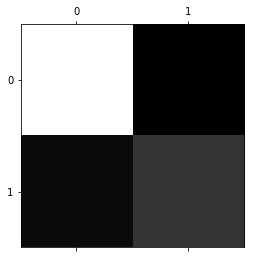

In [82]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier

print("-----Random Forest------")
rf = RandomForestClassifier(random_state=42)

do_test_forest(rf)

print("-----OvO Classifier Random Forest------")



rf = OneVsOneClassifier(rf)
do_test_forest(rf)
'''

print("----------SVM-----------")
svm = SVC(random_state=42, probability=True)
do_test_svm(svm)

print("----------Knn-----------")
knn = KNeighborsClassifier()
do_test_knn(knn)

print("-----Neural Network-----")
nn = MLPClassifier()
do_test_knn(nn)


print("--------AdaBoost Random Forest--------")

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9,
                            max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,
                            random_state=42, verbose=0, warm_start=False)

ada_clf = AdaBoostClassifier(
    rf,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)

print("---------Decision Tree------")
dt = DecisionTreeClassifier(random_state=42)

do_test_forest(dt)

print("--------AdaBoost Decision Tree--------")

dt = DecisionTreeClassifier(random_state=42)

ada_clf = AdaBoostClassifier(
    dt,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)


'''



In [30]:
'''
from sklearn.model_selection import GridSearchCV
params = dict()

random_forest = RandomForestClassifier()

params['forest'] = {
    'max_depth' : [6,7,8,9],
    'n_estimators': [30,100,300],
    'criterion': ['gini','entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf' : [1, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 3, 10],
}

grid_search = GridSearchCV(random_forest, params['forest'], cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_random_forest = grid_search.best_estimator_

predictions = best_random_forest.predict(x_test)
conf_mx = confusion_matrix(y_test, predictions)
plt.matshow(conf_mx, cmap=plt.cm.gray)
print(conf_mx)
print("\nAccuracy train set: " + str(sum(best_random_forest.predict(x_train) == y_train)/float(len(y_train))))
print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))
'''

'\nfrom sklearn.model_selection import GridSearchCV\nparams = dict()\n\nrandom_forest = RandomForestClassifier()\n\nparams[\'forest\'] = {\n    \'max_depth\' : [6,7,8,9],\n    \'n_estimators\': [30,100,300],\n    \'criterion\': [\'gini\',\'entropy\'],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\'],\n    \'min_samples_leaf\' : [1, 2, 4, 6, 8, 10],\n    \'min_samples_split\': [2, 3, 10],\n}\n\ngrid_search = GridSearchCV(random_forest, params[\'forest\'], cv=10, scoring=\'accuracy\')\ngrid_search.fit(x_train, y_train)\n\nbest_random_forest = grid_search.best_estimator_\n\npredictions = best_random_forest.predict(x_test)\nconf_mx = confusion_matrix(y_test, predictions)\nplt.matshow(conf_mx, cmap=plt.cm.gray)\nprint(conf_mx)\nprint("\nAccuracy train set: " + str(sum(best_random_forest.predict(x_train) == y_train)/float(len(y_train))))\nprint("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))\n'

-----Random Forest------
[[63  1  0  0]
 [ 1 52  0  2]
 [ 0  0 19  0]
 [ 1  5  0 31]]

Accuracy train set: 1.0
Accuracy test set: 0.9428571428571428


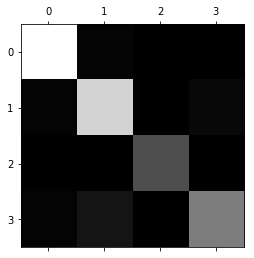

In [31]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier

print("-----Random Forest------")
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

do_test_forest(rf)


In [32]:
# Save model

from sklearn.externals import joblib
joblib.dump(rf, '../models/rf_model_' + file_name + '.sav') 


['../models/rf_model_all_60s_1s_64.csv.sav']

In [33]:
for path, subdirs, files in os.walk(base_folder):
    for name in files:
        if name == 'cap3.csv':
            test = pd.read_csv(os.path.join(str(path), str(name)))
test = test.drop(columns=['Unnamed: 0']).reset_index()
test.drop(columns=['index', 'up_packet_silence_mean', 'down_packet_silence_mean',
                      'down_packet_longest_silence', 'down_packet_shortest_silence','label'], inplace=True)
# Imputer for NaN
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(test)
test = pd.DataFrame(imputer.transform(test), columns=test.columns)
print(rf.predict_log_proba(test))
print(rf.predict(test))

[[-0.85775709 -1.36511737 -1.90905858 -1.75841844]
 [-1.30671931 -1.27479909 -3.90819891 -0.84459922]
 [-1.65517134 -0.77969983 -5.01063529 -1.06789769]
 [-0.80793102 -1.54991106 -2.71487541 -1.28829499]
 [-1.13787692 -0.89622223 -5.01063529 -1.32905958]
 [-1.46798092 -1.17841638 -5.70378247 -0.77977156]
 [-0.87102305 -1.15403153 -3.38469001 -1.46004475]
 [-1.55410649 -0.60344535 -4.60517019 -1.46232137]
 [-0.98766641 -0.94960912 -4.07990388 -1.4972086 ]
 [-1.48947032 -1.4780981  -4.60517019 -0.62280635]
 [-1.24363479 -0.71502763 -5.70378247 -1.51798154]]
[0. 3. 1. 0. 1. 3. 0. 1. 1. 3. 1.]


In [34]:
from sklearn.externals import joblib
rf = joblib.load('../models/rf_model_01s.sav')

In [35]:
print(prevlabel[4000])
dataset['label'][4000]


KeyError: 4000

In [ ]:
test